In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
wine = pd.read_csv('wine new.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [5]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,good


In [7]:
wine['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [9]:
X = wine.iloc[:,:-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
y= wine.iloc[:,-1]
y.head()

0     bad
1     bad
2     bad
3    good
4     bad
Name: quality, dtype: object

In [11]:
#data Normalization
from sklearn import preprocessing
X =preprocessing.StandardScaler().fit_transform(X)

In [12]:
X[0:4]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711]])

In [13]:
#Train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [14]:
y_test.shape

(480,)

In [15]:
#Training and Predicting
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 3)
knnmodel.fit(X_train,y_train)
ypredict = knnmodel.predict(X_test)

In [16]:
#Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,ypredict)
acc

0.7145833333333333

In [17]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypredict)
cm

array([[158,  72],
       [ 65, 185]], dtype=int64)

In [18]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
#output visualization
prediction_output =pd.DataFrame(data=[y_test.values,ypredict],index=['y_test','ypredict'])

In [20]:
prediction_output

,0,1,2,3,4,5,6,7,8,9,...,470,471,472,473,474,475,476,477,478,479
y_test,bad,good,good,good,good,good,good,bad,bad,bad,...,good,good,bad,good,bad,good,good,bad,good,good
ypredict,bad,bad,good,good,good,good,good,bad,good,good,...,good,good,good,good,bad,good,good,bad,good,good


In [22]:
prediction_output.transpose

<bound method DataFrame.transpose of           0     1     2     3     4     5     6    7     8     9    ...   470  \
y_test    bad  good  good  good  good  good  good  bad   bad   bad  ...  good   
ypredict  bad   bad  good  good  good  good  good  bad  good  good  ...  good   

           471   472   473  474   475   476  477   478   479  
y_test    good   bad  good  bad  good  good  bad  good  good  
ypredict  good  good  good  bad  good  good  bad  good  good  

[2 rows x 480 columns]>

In [23]:
#Finding the values of k
ks =21
mean_acc = np.zeros((ks-1))

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)
    

In [24]:
print(mean_acc)

[0.74583333 0.69375    0.71458333 0.72083333 0.70208333 0.71666667
 0.70833333 0.70833333 0.68541667 0.71041667 0.70625    0.70833333
 0.71041667 0.71666667 0.73125    0.725      0.73125    0.72708333
 0.71666667 0.71666667]


In [25]:
print("The best accuracy was with",mean_acc.max(),"with k=",mean_acc.argmax()+1)

The best accuracy was with 0.7458333333333333 with k= 1


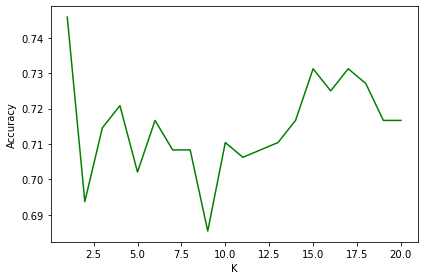

In [26]:
plt.plot(range(1,ks),mean_acc,'g')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.tight_layout()
plt.show()